In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Premiers pas avec le fichier

Le fichier est trop volumineux pour pouvoir le stocker sur le github. C'est pourquoi nous opérons quelques modifications.

In [26]:
df = pd.read_csv('/Users/augustincablant/Desktop/data.csv')
df.head()

/var/folders/bt/r1dg46ys21lb57m4n4x11m6c0000gn/T/ipykernel_2106/1225068217.py:1: DtypeWarning: Columns (2,3,8,12,28,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/augustincablant/Desktop/data.csv')


,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,77799293,FR,IP-13-JN1-2017-0018,RENAULT-NISSAN-MITSUBISHI,NISSAN AUTOMOTIVE EUROPE,NISSAN AUTOMOTIVE EUROPE SAS,NaN,e5*2007/46*1028*00,ME0M,B,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-01-24,NaN,200.0
1,77799294,FR,IP-13-JN1-2017-0018,RENAULT-NISSAN-MITSUBISHI,NISSAN AUTOMOTIVE EUROPE,NISSAN AUTOMOTIVE EUROPE SAS,NaN,e5*2007/46*1028*00,ME0M,B,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-03-31,NaN,200.0
2,77799295,FR,IP-13-JN1-2017-0018,RENAULT-NISSAN-MITSUBISHI,NISSAN AUTOMOTIVE EUROPE,NISSAN AUTOMOTIVE EUROPE SAS,NaN,e5*2007/46*1028*03,ME0M,B,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-05-23,NaN,200.0
3,77499852,FR,IP-ZXK____REDU7760-VF7-0,STELLANTIS,AUTOMOBILES CITROEN,AUTOMOBILES CITROEN,NaN,e2*2007/46*0530*14,V,Z,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-05-11,NaN,211.0
4,77499853,FR,IP-ZXK____REDU7760-VF7-0,STELLANTIS,AUTOMOBILES CITROEN,AUTOMOBILES CITROEN,NaN,e2*2007/46*0530*14,V,Z,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-05-12,NaN,210.0


In [3]:
df.shape

(1322601, 38)

In [4]:
df.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [27]:
# On conserve que la France 

df_fr = df[df['Country']=='FR']
df_fr.shape

(214432, 38)

In [28]:
# On opère à une sélection des colonnes 
colonnes_utiles = ['Mp','m (kg)', 'Ft', 'ep (KW)', 'z (Wh/km)','Status', 'year', 'Fuel consumption ', 'Electric range (km)']
df_fr = df_fr[colonnes_utiles]
df_fr.shape

(214432, 9)

In [29]:
df_fr.to_csv('/Users/augustincablant/Documents/GitHub/Pycar/DOWNLOAD/voitures_fr.csv')

Fin de la procédure.

# Passons à l'analyse du fichier 

In [2]:
os.chdir("/Users/augustincablant/Documents/GitHub/Pycar")
df = pd.read_csv('DOWNLOAD/voitures_fr.csv')
df.drop('Unnamed: 0', axis=1, inplace = True)

In [39]:
df.sample(10)

,Mp,m (kg),Ft,ep (KW),z (Wh/km),Status,year,Fuel consumption,Electric range (km)
114608,RENAULT-NISSAN-MITSUBISHI,1012.0,ELECTRIC,18.0,139.0,P,2022,NaN,230.0
176647,RENAULT-NISSAN-MITSUBISHI,1711.0,ELECTRIC,55.0,158.0,P,2022,NaN,446.0
91554,NaN,1765.0,ELECTRIC,50.0,180.0,P,2022,NaN,301.0
44714,BMW,2290.0,ELECTRIC,125.0,197.0,P,2022,NaN,480.0
121094,KIA,2090.0,ELECTRIC,81.0,184.0,P,2022,NaN,472.0
92687,RENAULT-NISSAN-MITSUBISHI,1580.0,ELECTRIC,90.0,171.0,P,2022,NaN,270.0
45034,BMW,2255.0,ELECTRIC,210.0,189.0,P,2022,NaN,453.0
108672,RENAULT-NISSAN-MITSUBISHI,1012.0,ELECTRIC,18.0,139.0,P,2022,NaN,230.0
45117,BMW,2255.0,ELECTRIC,210.0,189.0,P,2022,NaN,453.0
111153,RENAULT-NISSAN-MITSUBISHI,1012.0,ELECTRIC,18.0,139.0,P,2022,NaN,230.0


In [42]:
list(df.columns)

['Mp',
 'm (kg)',
 'Ft',
 'ep (KW)',
 'z (Wh/km)',
 'Status',
 'year',
 'Fuel consumption ',
 'Electric range (km)']

In [34]:
list(df['Ft'].unique())

['ELECTRIC', 'PETROL/ELECTRIC', 'DIESEL/ELECTRIC', 'HYDROGEN']

In [36]:
list(df['Mp'].unique())

['RENAULT-NISSAN-MITSUBISHI',
 'STELLANTIS',
 'VOLKSWAGEN',
 'TESLA-HONDA-JLR',
 nan,
 'MAZDA-SUBARU-SUZUKI-TOYOTA',
 'BMW',
 'FORD',
 'MERCEDES-BENZ',
 'HYUNDAI MOTOR EUROPE',
 'KIA']

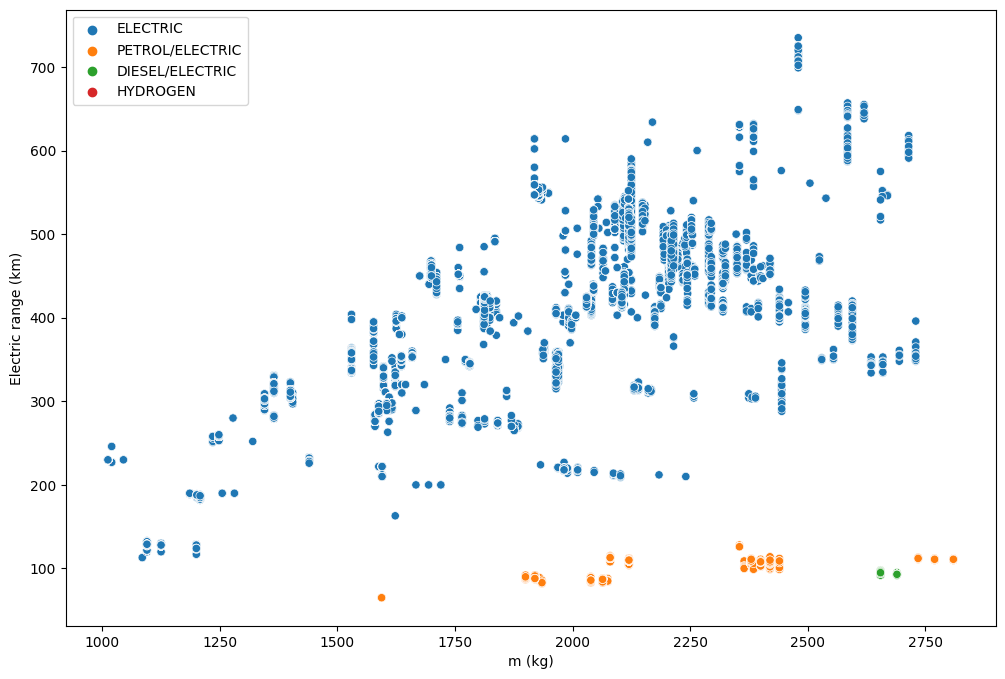

In [45]:
# Autonomie des véhicules électriques en fonction de leur poids 
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='m (kg)', y = 'Electric range (km)', hue = 'Ft')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.legend()
plt.show()

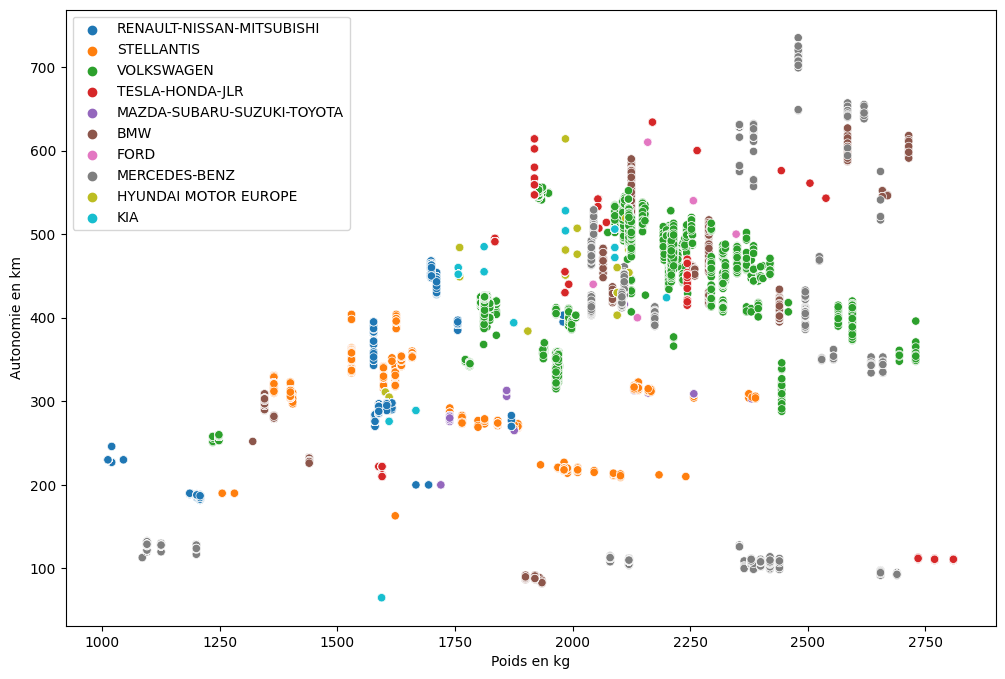

In [46]:
# Autonomie des véhicules électriques en fonction de leur poids selon le constructeur
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='m (kg)', y = 'Electric range (km)', hue = 'Mp')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.legend()
plt.show()

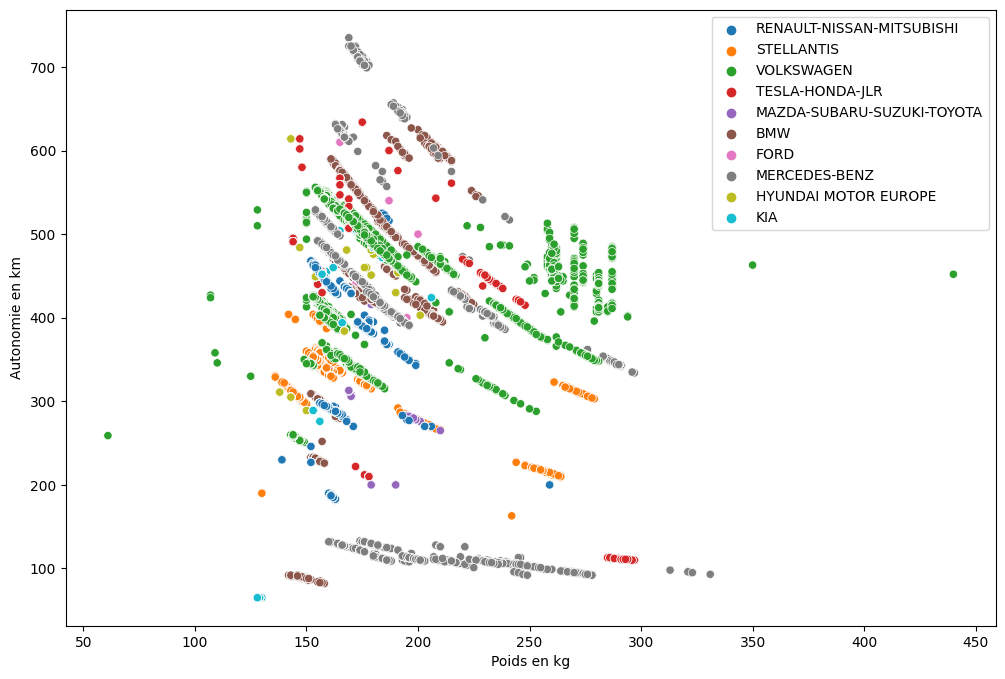

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='z (Wh/km)', y = 'Electric range (km)', hue = 'Mp')
plt.xlabel('Poids en kg')
plt.ylabel('Autonomie en km')
plt.legend()
plt.show()

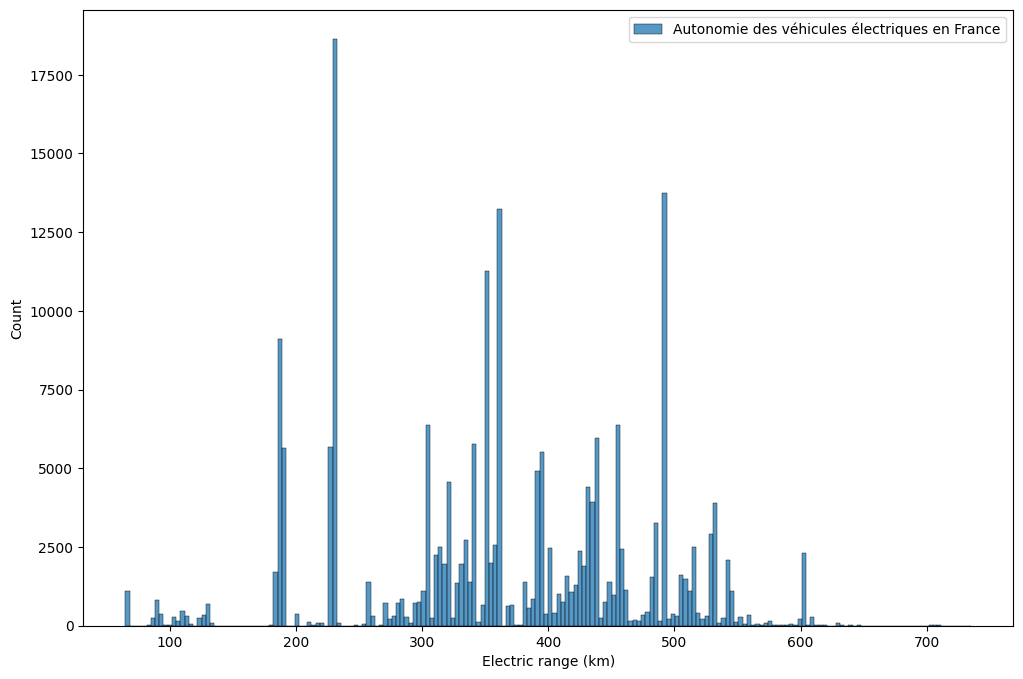

In [8]:
# Comparons l'autonomie des véhicules 
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='Electric range (km)', bins = 200, label = 'Autonomie des véhicules électriques en France')
plt.legend()
plt.show()